In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import scipy.integrate as integrate

%matplotlib inline

In [23]:
#Elementos no diagonales de la matriz densidad particula libre 

def rho_free(x,xp,beta):
    return (np.exp(-(x-xp)**2/(2.0*beta))/np.sqrt(2.0*np.pi*beta))


#matriz densidad anarmónica: expansion de Trotter 

def rho_anharmonic_trotter(grid,beta):
    return np.array([[rho_free(x,xp,beta)*np.exp(-0.5*beta*0.5*(x**2 + xp**2))* \
                      np.exp(0.5*beta*(x**3 + xp**3)) * np.exp(-0.5*beta*(x**4 + xp**4)) \
                      for x in grid] for xp in grid])

#matriz densidad para 2beta

def density_matrix_2b(x,beta_tmp,beta,dx,nx):
    
    #matriz densidad a beta inicial
    rho = rho_anharmonic_trotter(x, beta_tmp) 

    while beta_tmp < beta:
        rho = np.dot(rho,rho)
        rho *= dx 
        beta_tmp *= 2.0 
        
    #función partición
    Z = sum([rho[j,j] for j in range(nx)]) * dx

    #Probabilidad de estar: x=x'
    pix = [rho[j,j]/Z for j in range(nx)]

    return pix,beta_tmp
       
#definición de probabilidades exactas

def quantum_probability(x,b):
    Pi_quantum  = np.sqrt(np.tanh(b/2.0)/np.pi)*np.exp(-(x**2)*(np.tanh(b/2.0)))
    return Pi_quantum
                                                          
def classic_probability(x,b):
    Pi_classic = np.sqrt(b/(2*np.pi))*np.exp(-(b*(x**2))/2.0)
    return Pi_classic                                                     

def anharmonic_quantum_probability(x,b):
    Pi_quantum  = np.sqrt(2*np.pi*b)*np.exp(-0.5*b*(x**2)*(1-2*x+2*(x**2)))
    return Pi_quantum



0.015625


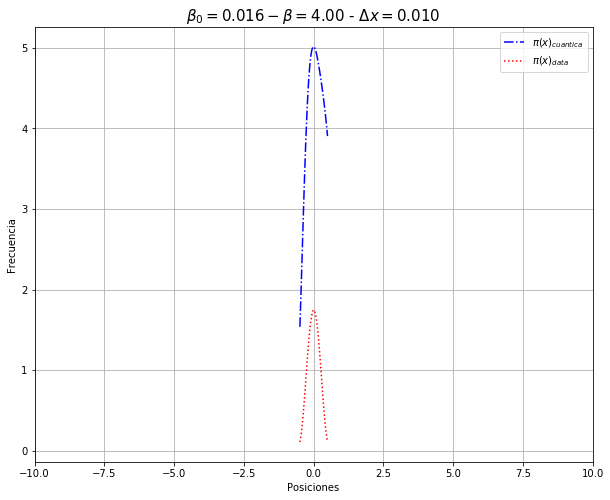

0.015625


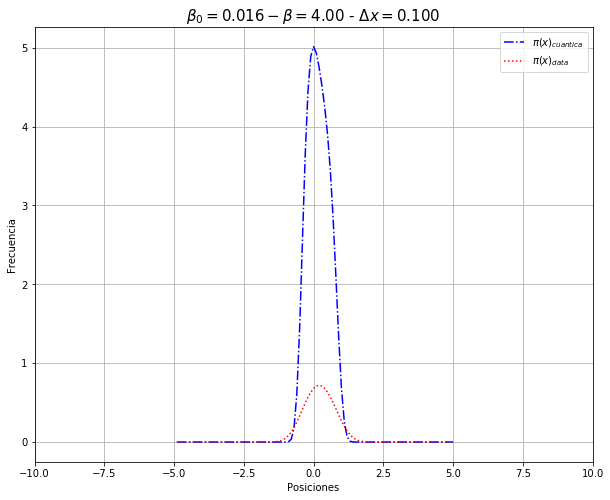

0.015625


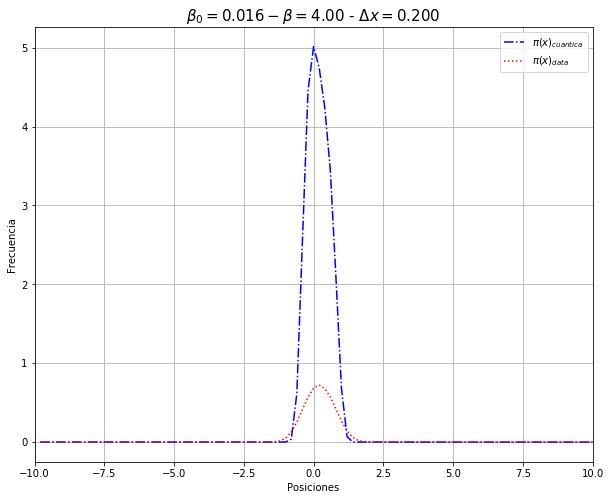

/home/laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


0.015625


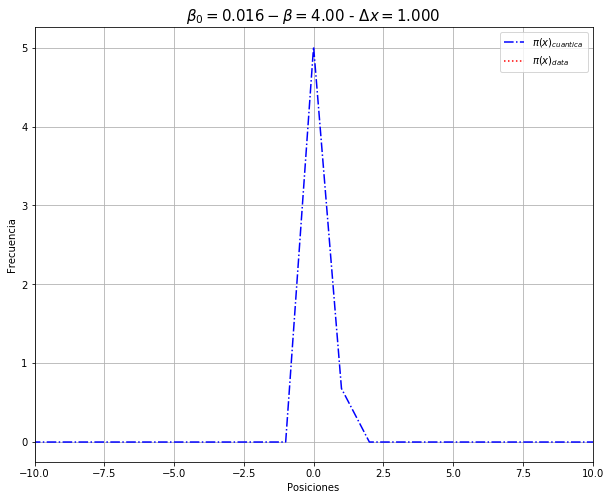

In [31]:
#---------------------------------------#
#grafica y escritura de archivo de datos
#\pi(x) from matrix squaring
#---------------------------------------#
    
x_max = 5.0
nx = 100

xa = int(-(nx-1)/2)   #-49
xb = int(nx/2 + 1)    #51

#valor inicial de beta
beta_tmp = [2.0**(-6)]

#valor real de beta 
beta = 2.0**(2) 
#beta = 0.1

deltax = 2.0*x_max / (nx-1)

dx = [0.01,0.1,0.2,1.0]


for k in dx:
    
    x = [i*k for i in range(xa, xb)]

    for p in beta_tmp:
        
        pi_of_x,beta_tmp1 = density_matrix_2b(x,p,beta,k,nx)

        #escribir archivo de datos..
    
        f = open('anharmonic_matrixsquaring_beta%.1f_dx%.3f.dat'%(beta,k),'w')

        for j in range (nx):
            f.write("%.8f %.8f\n"%(x[j],pi_of_x[j]))
        f.close()
    
        b = beta_tmp1
       
        print(p)
    
        y_quantum = [anharmonic_quantum_probability(m,b) for m in x]
                                                          
        y_classic = [classic_probability(m,b) for m in x]
                
        #graficas..
    
        plt.figure(figsize=(10,8))
        plt.plot(x, y_quantum, ls='-.', color = "b", label = r"$\pi(x)_{cuantica}$")
        #plt.plot(x, y_classic, lw=1.3, color = "k", label = r"$\pi(x)_{clasica}$")
        plt.plot(x, pi_of_x, ls=':', color="r",label=r"$\pi(x)_{data}$")
        plt.xlim(-10,10)
        plt.title(r"$\beta_{0}=%0.3f - \beta=%0.2f$ - $\Delta x =%0.3f$"%(p,b,k),fontsize = 15)
        plt.xlabel(r"Posiciones")
        plt.ylabel(r"Frecuencia")
        plt.grid()
        plt.legend()
        plt.savefig("images/img/anharmo_ms_bini%0.3f_b4_deltax%0.3f.png"%(p,k))
        plt.show()




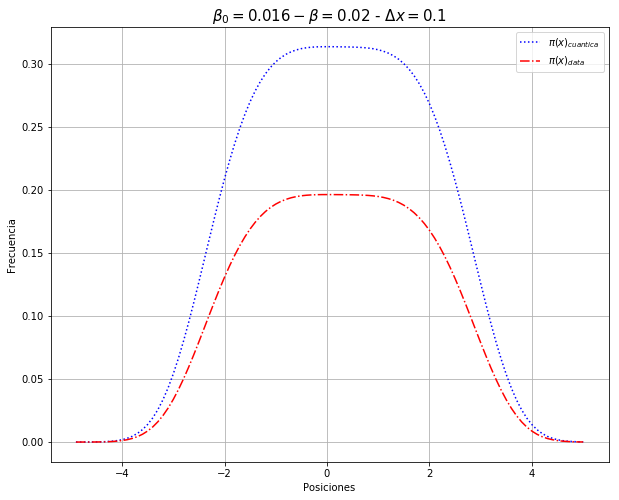

In [33]:
#graficas con mejores parámetros iniciales: beta0 = todos, deltax = 0.2

Dx=0.1

X = [i*Dx for i in range(xa, xb)]

betta = 0.0001

for p in beta_tmp:

    pi_of_x,beta_tmp1 = density_matrix_2b(X,p,betta,Dx,nx)

    #escribir archivo de datos..
    
    f = open('anharmonic_matrixsquaring_b%0.3f_optimos.dat'%(p),'w')

    for j in range(nx):
        f.write("%.8f %.8f\n"%(X[j],pi_of_x[j]))
    f.close()
    
    #b = 2*beta_tmp1
    b=beta_tmp1
    
    y_quantum = [anharmonic_quantum_probability(m,b) for m in X]
                                                          
    y_classic = [classic_probability(m,b) for m in X]
    #graficas..
    
    plt.figure(figsize=(10,8))
    plt.plot(X, y_quantum, ls=':', color = "b", label = r"$\pi(x)_{cuantica}$")   
    #plt.plot(X, y_classic, lw=1.3, color = "k", label = r"$\pi(x)_{clasica}$")
    plt.plot(X, pi_of_x, ls='-.', color="r",label=r"$\pi(x)_{data}$")        
    plt.title(r"$\beta_{0}=%0.3f - \beta=%0.2f$ - $\Delta x = 0.1$"%(p,b),fontsize = 15)
    plt.xlabel(r"Posiciones")
    plt.ylabel(r"Frecuencia")
    plt.grid()
    plt.legend()
    plt.savefig("images/img/opti_altaT_bini%0.3f.png"%p)
    plt.show()
